## 의사결정나무 (Decision Tree)


[예제 ] 붓꽃(Iris) 품종 

- 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 측정하여 품종을 예측한다
- 150개의 데이타에서 3가지 품종(setosa, versicolor, virginica)로 분류한다

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# 1. 데이타 로딩

iris = datasets.load_iris()

# 데이터 key 확인
# print(iris.keys())


In [3]:
# 2. 데이터와 레이블 분리 변수 선언
X = iris.data
y = iris.target

# 3. 데이타셋을 분리 ( 학습용:검증용 = 7:3 )
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)


In [15]:
# 5. 트리 모델 생성하고 학습하기

from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
# 6. 정확도


print('학습용 데이타의 정확도: {:.3f}'.format(iris_tree.score(X_train, y_train)))
print('검증용 데이타의 정확도: {:.3f}'.format(iris_tree.score(X_test, y_test)))

학습용 데이타의 정확도: 0.978
검증용 데이타의 정확도: 0.943





---

# 결정트리 시각화

[ 참고 ] graphviz 설치

- pip install graphviz


- 아래 설치와 환경설정이 필요한가?

- http://www.graphviz.org/download/ 

   > Windows > Stable 2.38 Windows install packages > graphviz-2.38.msi 다운로드 받아 실행

- 환경변수 지정 (소스에서 ) : C:/Program Files (x86)/Graphviz2.38/bin/



        import os

        os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [9]:
# !pip install graphviz

In [10]:
# pydotplus 설치
# ! pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=a4e233f42f2a900734b3c1356fba56e617a6fe48cd3540646f6eb4ebc4b6c6d4
  Stored in directory: c:\users\canon\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [17]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

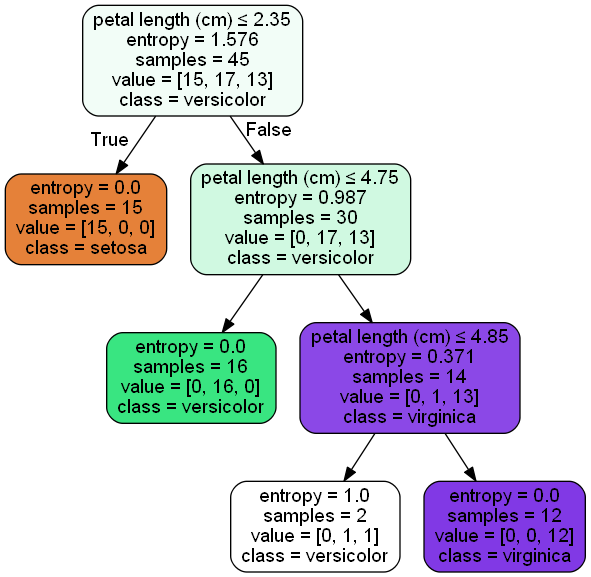

In [18]:
# graphviz의 경로를 환경변수 PATH에 등록
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

        #dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
        #                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)


# 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 이미지로 변환
Image(graph.create_png())